In [ ]:
import numpy as np
#用w的多项式形式的低效算法
def ccint(f, n):
    #切比雪夫第二类节点
    theta = np.linspace(0, np.pi, n + 1)
    x = -np.cos(theta)
    #初始化权重w和系数gamma
    w = np.zeros(n + 1)
    w[0] = 1 / (n**2 - 1)
    w[n] = 1 / (n**2 - 1)
    gamma = [2, 1]
    #计算权重
    for k in range(1, n):
        for j in range(int(n / 2) + 1):
            if j == 0 or j == int(n / 2):
                w[k] += np.cos(2 * np.pi * j * k / n) / (gamma[0] * (1 - 4 * j**2))
            else:
                w[k] += np.cos(2 * np.pi * j * k / n) / (gamma[1] * (1 - 4 * j**2))
        w[k] *= 4 / n

    I = np.dot(w, f(x))

    return I, x

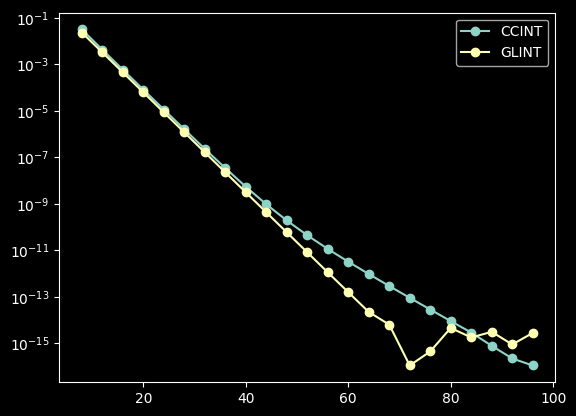

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ccint(f, n):
    # Find Chebyshev extreme nodes.
    theta = np.linspace(0, np.pi, n + 1)
    x = -np.cos(theta)

    # Compute the C-C weights.
    c = np.zeros(n + 1)
    c[[0, n]] = 1 / (n**2 - 1)
    v = np.ones(n - 1)
    for k in range(1, int(n / 2)):
        v -= 2 * np.cos(2 * k * theta[1:-1]) / (4 * k**2 - 1)
    v -= np.cos(n * theta[1:-1]) / (n**2 - 1)
    c[1:-1] = 2 * v / n

    # Evaluate integrand and integral.
    I = np.dot(c, f(x))  # use vector inner product
    return I, x

def glint(f, n):
    # Nodes and weights are found via a tridiagonal eigenvalue problem.
    beta = 0.5 / np.sqrt(1 - (2.0 * np.arange(1, n)) ** (-2))
    T = np.diag(beta, 1) + np.diag(beta, -1)
    ev, V = np.linalg.eig(T)
    ev = np.real_if_close(ev)
    p = np.argsort(ev)
    x = ev[p]  # nodes
    c = 2 * V[0, p] ** 2  # weights

    # Evaluate the integrand and compute the integral.
    I = np.dot(c, f(x))  # vector inner product
    return I, x

f = lambda x: 1 / (1 + 16 * x**2)
exact = np.atan(4) / 2

N = range(8, 100, 4)
errCC = np.zeros(len(N))
errGL = np.zeros(len(N))

for k, n in enumerate(N):
    errCC[k] = exact - ccint(f, n)[0]
    errGL[k] = exact - glint(f, n)[0]

plt.semilogy(N, abs(errCC), '-o', label="CCINT")
plt.semilogy(N, abs(errGL), '-o', label="GLINT")
plt.legend()
plt.show()

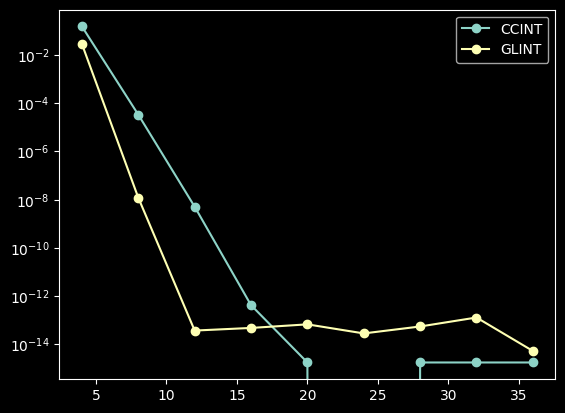

In [13]:
#9.6.3
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def ccint(f, n):
    # Find Chebyshev extreme nodes.
    theta = np.linspace(0, np.pi, n + 1)
    x = -np.cos(theta)

    # Compute the C-C weights.
    c = np.zeros(n + 1)
    c[[0, n]] = 1 / (n**2 - 1)
    v = np.ones(n - 1)
    for k in range(1, int(n / 2)):
        v -= 2 * np.cos(2 * k * theta[1:-1]) / (4 * k**2 - 1)
    v -= np.cos(n * theta[1:-1]) / (n**2 - 1)
    c[1:-1] = 2 * v / n

    # Evaluate integrand and integral.
    I = np.dot(c, f(x))  # use vector inner product
    return I, x

def glint(f, n):
    # Nodes and weights are found via a tridiagonal eigenvalue problem.
    beta = 0.5 / np.sqrt(1 - (2.0 * np.arange(1, n)) ** (-2))
    T = np.diag(beta, 1) + np.diag(beta, -1)
    ev, V = np.linalg.eig(T)
    ev = np.real_if_close(ev)
    p = np.argsort(ev)
    x = ev[p]  # nodes
    c = 2 * V[0, p] ** 2  # weights

    # Evaluate the integrand and compute the integral.
    I = np.dot(c, f(x))  # vector inner product
    return I, x

f = lambda x: np.exp(-4 * x)
exact = np.sinh(4) / 2

N = range(4, 40, 4)
errCC = np.zeros(len(N))
errGL = np.zeros(len(N))

for k, n in enumerate(N):
    errCC[k] = exact - ccint(f, n)[0]
    errGL[k] = exact - glint(f, n)[0]

plt.semilogy(N, abs(errCC), '-o', label="CCINT")
plt.semilogy(N, abs(errGL), '-o', label="GLINT")
plt.legend()
plt.show()

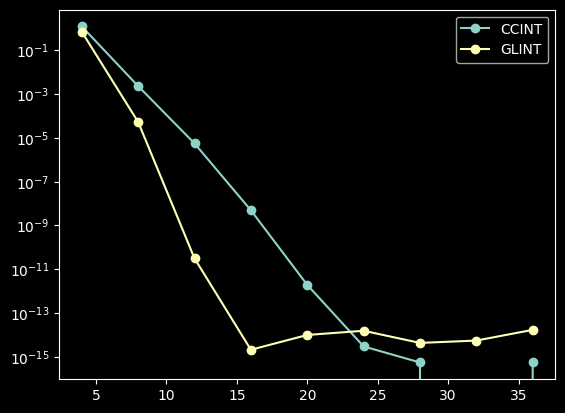

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def ccint(f, n, a=-1., b=1.):
    # Find Chebyshev extreme nodes.
    theta = np.linspace(0, np.pi, n + 1)
    x = -np.cos(theta)
    x = (b - a) / 2.0 * x + (a + b) / 2.0
    # Compute the C-C weights.
    c = np.zeros(n + 1)
    c[[0, n]] = 1 / (n**2 - 1)
    v = np.ones(n - 1)
    for k in range(1, int(n / 2)):
        v -= 2 * np.cos(2 * k * theta[1:-1]) / (4 * k**2 - 1)
    v -= np.cos(n * theta[1:-1]) / (n**2 - 1)
    c[1:-1] = 2 * v / n

    # Evaluate integrand and integral.
    I = np.dot(c, f(x))  # use vector inner product
    I *= (b - a) / 2
    return I, x

def glint(f, n, a, b):
    # Nodes and weights are found via a tridiagonal eigenvalue problem.
    beta = 0.5 / np.sqrt(1 - (2.0 * np.arange(1, n)) ** (-2))
    T = np.diag(beta, 1) + np.diag(beta, -1)
    ev, V = np.linalg.eig(T)
    ev = np.real_if_close(ev)
    p = np.argsort(ev)
    x = ev[p]  # nodes
    c = 2 * V[0, p] ** 2  # weights
    x = (b - a) / 2.0 * x + (a + b) / 2.0

    # Evaluate the integrand and compute the integral.
    I = np.dot(c, f(x))  # vector inner product
    I *= (b - a) / 2

    return I, x

f = lambda x: x**2 * np.sin(8 * x)
exact = -3 * np.pi**2 / 32

N = range(4, 40, 4)
errCC = np.zeros(len(N))
errGL = np.zeros(len(N))

for k, n in enumerate(N):
    errCC[k] = exact - ccint(f, n, np.pi /2, np.pi)[0]
    errGL[k] = exact - glint(f, n, np.pi /2, np.pi)[0]

plt.semilogy(N, abs(errCC), '-o', label="CCINT")
plt.semilogy(N, abs(errGL), '-o', label="GLINT")
plt.legend()
plt.show()

In [9]:
#9.6.5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def trapezoid(f, a, b, n):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = f(t)
    T = h * (np.sum(y[1:-1]) + 0.5 * (y[0] + y[-1]))
    return T, t, y

a = 0
b = 2 * np.pi
omega = lambda theta: (np.sin(np.exp(np.sin(theta))))**(-1)
N = [10, 20, 40, 80, 160, 320]
T = np.ones(6)
for k, n in enumerate(N):
    T[k] = trapezoid(omega, a, b, n)[0]

data = {
    'n': N,
    'int_calculated': T,
}
df = pd.DataFrame(data)
pd.set_option('display.float_format', '{:.20f}'.format)
print(df)



     n          int_calculated
0   10 10.89338128942702077495
1   20 10.92859886416543524490
2   40 10.92842605753376084010
3   80 10.92842605337440176072
4  160 10.92842605337440176072
5  320 10.92842605337440176072
